In [1]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

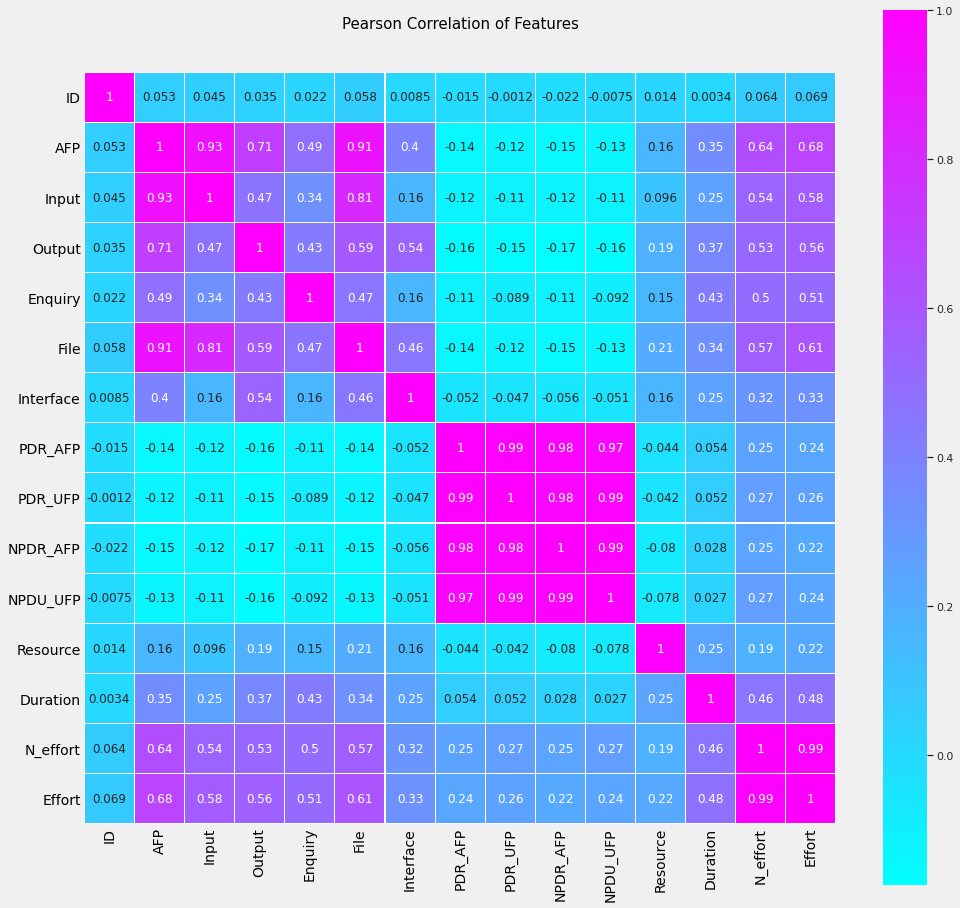

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
df_china = pd.read_csv('./china.csv',  header=0)
df_china.corr()
colormap = plt.cm.cool
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.0)
df_china = df_china.drop(['Dev.Type'], axis=1)
df_china = df_china.drop(['Added'], axis=1)
df_china = df_china.drop(['Changed'], axis=1)
df_china = df_china.drop(['Deleted'], axis=1)
sns.heatmap(df_china.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)
plt.show()

In [3]:
features = ['AFP', 'Input', 'Output','Enquiry','File','N_effort','PDR_AFP','PDR_UFP','NPDR_AFP','NPDR_UFP', 'Resources', 'Duration']
max_corr_features = ['AFP', 'Input', 'Output','Enquiry','File','N_effort']
X = df_china[max_corr_features]
y = df_china['Effort']

In [4]:
def accuracy(true, pred):
    count = 0
    for i in range(len(true)):
        if abs(true[i]-pred[i])<=500:
            count += 1
    return ((float(count)*100)/len(true))

def mse(true, pred):
    ans = 0
    for i in range(len(true)):
        ans+= (abs(true[i]-pred[i]))**2
    return ans/len(true)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
Y = y_test.to_numpy()
Y_list = Y.tolist()

In [6]:
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train) 
y_pred_K = neigh.predict(X_test)
pred_list_K = y_pred_K.tolist()
ans = accuracy(Y_list, pred_list_K)
m = mse(Y_list, pred_list_K)
print("K Nearest Neighbors Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", neigh.score(X_test, y_test)*100)
print()

K Nearest Neighbors Analysis
Accuracy =  84.24242424242425
Mean square Error =  1221220.5670033677
Training accuracy =  96.91978053118923



In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_L = model.predict(X_test)
l_list = y_pred_L.tolist()
ans = accuracy(Y_list, l_list)
m = mse(Y_list, l_list)
print("Linear Regression Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", model.score(X_test, y_test)*100)
print()

Linear Regression Analysis
Accuracy =  83.03030303030303
Mean square Error =  2840004.3424550747
Training accuracy =  92.83680859666268



In [8]:
parameters = {'kernel':('linear', 'rbf')}

LinearSVC = LinearSVR(max_iter = 10000,C=1)
LinearSVC.fit(X_train, y_train)
svr_pred = LinearSVC.predict(X_test)
svr_list = svr_pred.tolist()
ans = accuracy(Y_list, svr_list)

m = mse(Y_list, svr_list)
print("Support Vector Machine Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", LinearSVC.score(X_test, y_test)*100)
print()

Support Vector Machine Analysis
Accuracy =  81.81818181818181
Mean square Error =  3197164.365005755
Training accuracy =  91.93596293072291



/home/prakriti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
regressor = RandomForestRegressor(n_estimators=50)
for i in range(5):
    regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
pred_list = y_pred.tolist()
ans = accuracy(Y_list, pred_list)
m = mse(Y_list, pred_list)
print("Random forest Analysis")
print("Accuracy = ", ans)
print("Mean square Error = ", m)
print("Training accuracy = ", regressor.score(X_test, y_test)*100)
print()

Random forest Analysis
Accuracy =  86.06060606060606
Mean square Error =  1649608.534533333
Training accuracy =  95.83928042052705



/home/prakriti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


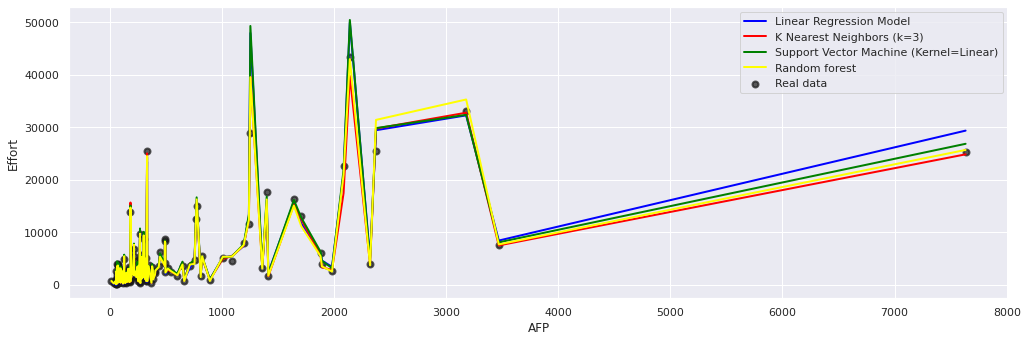

/home/prakriti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


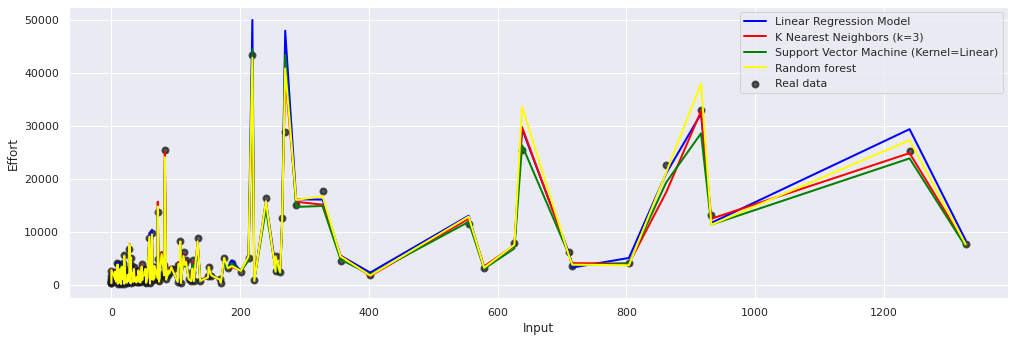

/home/prakriti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


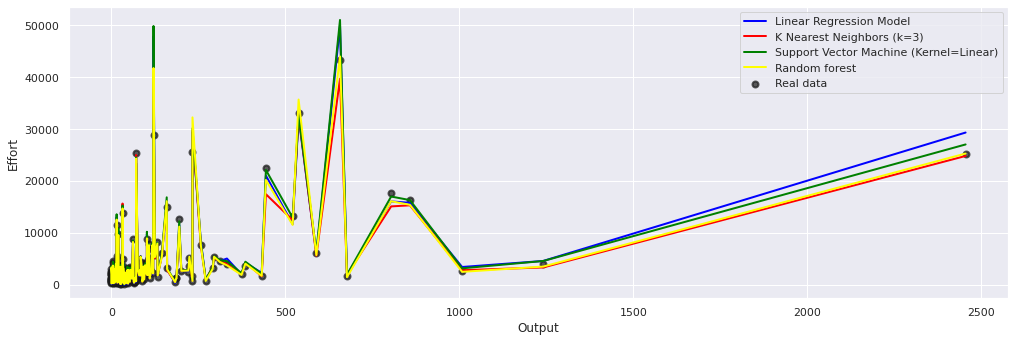

/home/prakriti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


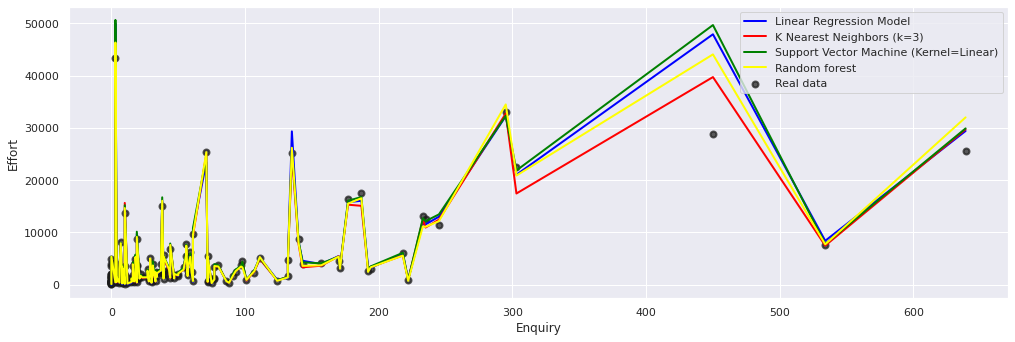

/home/prakriti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


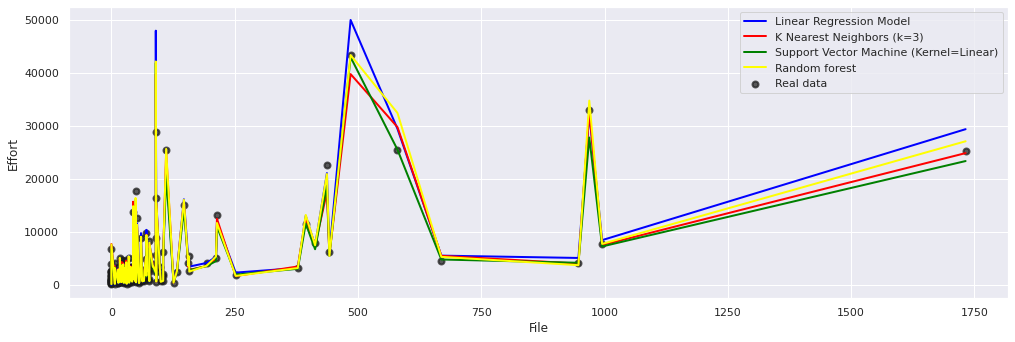

/home/prakriti/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


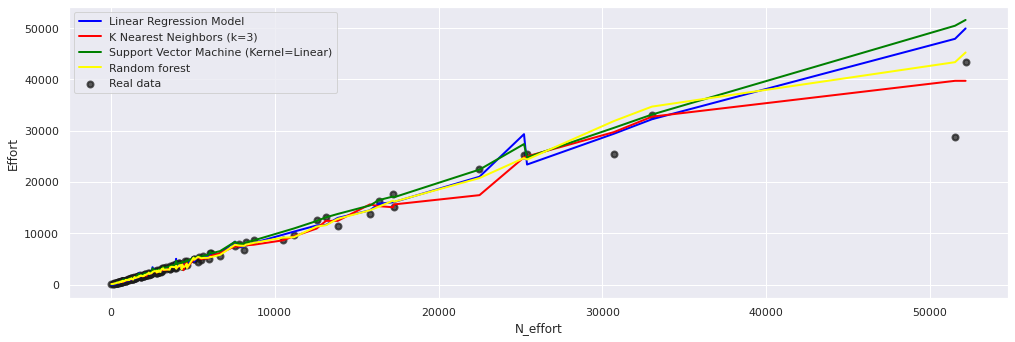

In [10]:
for i, feature in enumerate(max_corr_features):
   
    # Knn Regression Model 
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    
    # Linear Regression Model 
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    
    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))
    
    #Random forest Model
    rf_model_xs, rf_model_ys = zip(*sorted(zip(X_test[feature], regressor.fit(X_train, y_train).predict(X_test))))

    plt.scatter(X_test[feature], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model_xs, model_ys , lw=2, label='Linear Regression Model', c='blue')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='red')
    plt.plot(svc_model_xs, svc_model_ys , lw=2,label='Support Vector Machine (Kernel=Linear)', c='green')
    plt.plot(rf_model_xs, rf_model_ys, lw=2, label='Random forest', c='yellow')

    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()